In [7]:
using Pkg; Pkg.update()

using OceananigansAnalysis, NetCDF, Glob, PyPlot, JLD2

const noutput = 32;

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
  Updating git-repo `https://github.com/glwagner/OceananigansAnalysis.git`
 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [8]:
simname = "free_convection"

@show example_filepath = glob(simname * "*.nc", ".")[end]
@show vars = parse_filename(simname, example_filepath)
@show simtime(simname, example_filepath, noutput) simiter(simname, example_filepath, noutput)

example_filepath = (glob(simname * "*.nc", "."))[end] = "./free_convection_N256_Q-10.0_dTdz0.005_k0.0001_dt3_days8_31.nc"
vars = parse_filename(simname, example_filepath) = Dict{String,Any}("Q"=>-10.0,"dbdz"=>1.01499e-5,"tfinal"=>691200.0,"dTdz"=>0.005,"N"=>256,"k"=>0.0001,"days"=>8.0,"num"=>31,"dt"=>3.0,"Fb"=>4.72726e-9)
simtime(simname, example_filepath, noutput) = 691200.0
simiter(simname, example_filepath, noutput) = 230400


230400

In [9]:
ncinfo(example_filepath)


##### NetCDF File #####

/Users/gregorywagner/Desktop/data/free_convection_N256_Q-10.0_dTdz0.005_k0.0001_dt3_days8_31.nc

##### Dimensions #####

Name                                                Length                    
--------------------------------------------------------------------------------
yC                                                  256                       
zF                                                  256                       
xC                                                  256                       
yF                                                  256                       
xF                                                  256                       
zC                                                  256                       

##### Variables #####

Name                            Type            Dimensions                      

##### Attributes #####

Variable            Name                Value                                   
--------

--------------------------------------------------------------------------------
T                               DOUBLE          xC yC zC                        
xF                              DOUBLE          xF                              
xC                              DOUBLE          xC                              
yF                              DOUBLE          yF                              
v                               DOUBLE          xC yF zC                        
w                               DOUBLE          xC yC zF                        
yC                              DOUBLE          yC                              
zF                              DOUBLE          zF                              
zC                              DOUBLE          zC                              
S                               DOUBLE          xC yC zC                        
u                               DOUBLE          xF yC zC                        


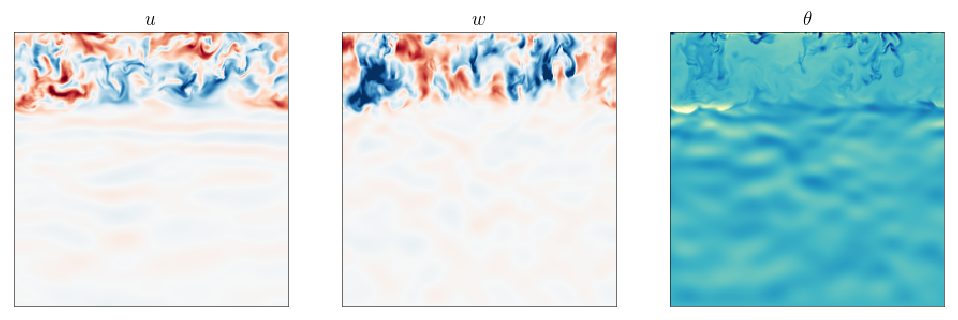

maximum(abs.(w.data)) = 0.014961845316377793
maximum(θ′.data) = 0.01238526196902967
minimum(θ′.data) = -0.010787721384076576


PyObject <matplotlib.collections.QuadMesh object at 0x141e27ac8>

In [10]:
u, v, w, θ, s = load_solution(example_filepath)
U, V, W, T, S = means(u, v, w, θ, s)
u′, v′, w′, θ′, s′ = fluctuations(u, v, w, θ, s)

fig, axs = subplots(ncols=3, figsize=(12, 4))
makesquare(axs)

for ax in axs
    ax.tick_params(left=false, labelleft=false, bottom=false, labelbottom=false)
end

@show maximum(abs.(w.data)) maximum(θ′.data) minimum(θ′.data)

w₀= 0.006
θ′₀ = 0.005

sca(axs[1])
title(L"u")
xzsliceplot(u′, cmap="RdBu", vmin=-w₀, vmax=w₀)

sca(axs[2])
title(L"w")
xzsliceplot(w, cmap="RdBu_r", vmin=-w₀, vmax=w₀)

sca(axs[3])
title(L"\theta")
xzsliceplot(θ′, cmap="YlGnBu_r", vmin=-θ′₀, vmax=θ′₀)

In [ ]:
filepath = "test.jld2"
isfile(filepath) && rm(filepath)

create_timeseries(filepath, simname=simname, noutput=noutput)

file = jldopen(filepath, "r")
@show file
close(file)